In [32]:
import trimesh
from shapely.geometry import Polygon, Point
from geopandas import GeoSeries
import numpy as np

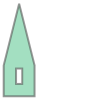

In [27]:
p = Polygon([(0,0), (0,1), (0.5,3), (1,1), (1,0)], [[(0.4,0.4), (0.4,0.9),(0.6,0.9),(0.6,0.4)]])
p

0     True
1    False
2    False
dtype: bool


True

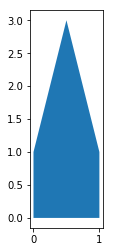

In [145]:
g = GeoSeries(p)
gp = GeoSeries([Point(0.3,0.3), Point(0.4,0.4), Point(1,1)])
print(gp.within(g))
g.plot()

p.contains(Point(0.1,0.1))

In [164]:
xmin, xmax, ymin, ymax = -10, 10, -10, 10
length = 512
xx, yy = np.meshgrid(np.linspace(xmin, xmax, length), np.linspace(ymin, ymax, length))
xc = xx.flatten()
yc = yy.flatten()
print(xx, yy)
print(xx.shape, xc.shape, yy.shape, yc.shape)

(array([[-10.        ,  -9.96086106,  -9.92172211, ...,   9.92172211,
          9.96086106,  10.        ],
       [-10.        ,  -9.96086106,  -9.92172211, ...,   9.92172211,
          9.96086106,  10.        ],
       [-10.        ,  -9.96086106,  -9.92172211, ...,   9.92172211,
          9.96086106,  10.        ],
       ..., 
       [-10.        ,  -9.96086106,  -9.92172211, ...,   9.92172211,
          9.96086106,  10.        ],
       [-10.        ,  -9.96086106,  -9.92172211, ...,   9.92172211,
          9.96086106,  10.        ],
       [-10.        ,  -9.96086106,  -9.92172211, ...,   9.92172211,
          9.96086106,  10.        ]]), array([[-10.        , -10.        , -10.        , ..., -10.        ,
        -10.        , -10.        ],
       [ -9.96086106,  -9.96086106,  -9.96086106, ...,  -9.96086106,
         -9.96086106,  -9.96086106],
       [ -9.92172211,  -9.92172211,  -9.92172211, ...,  -9.92172211,
         -9.92172211,  -9.92172211],
       ..., 
       [  9.92172

6.45130205154
2.46649098396


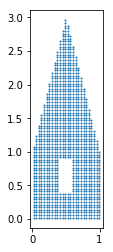

In [147]:
import time

data = np.full([length*length], 0)

start = time.time()

pts = GeoSeries([Point(x, y) for x, y in zip(xc, yc)])
in_map = np.array(pts.within(p))
grid1 = GeoSeries([pts[i] for i in range(len(pts)) if in_map[i]])

print(time.time()-start)

##------------------------------------------------------------

start2 = time.time()

trr = [p.contains(Point(x, y)) for x, y in zip(xc, yc)]
data[trr] = 255
img = data.reshape(length, length)

print(time.time()-start2)

grid1.plot(markersize=1)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


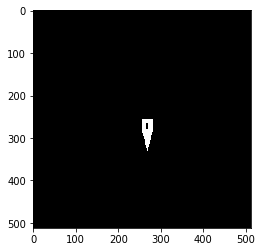

In [160]:
import matplotlib.pyplot as plt
print(img)
plt.imshow(img, cmap='gray')

In [170]:
import time
from multiprocessing import Pool, Array
from contextlib import closing

data = np.full([length*length], 0)

start = time.time()

trr = [p.contains(Point(x, y)) for x, y in zip(xc, yc)]
data[trr] = 255
img = data.reshape(length, length)

print(time.time()-start)

##------------------------------------------------------------

data = np.full([length*length], 0)

start2 = time.time()

xl = Array('d', xc)
yl = Array('d', yc)

def mu(i):
    return p.contains(Point(xl[i], yl[i]))

with closing(Pool()) as pool:
    data[pool.map(mu, range(len(xc)))] = 255

img = data.reshape(length, length)
    
print(time.time()-start2)

2.49856686592
0.92125916481
